# Enhancing Transaction Security with A/B Testing and Risk Pattern Analysis

## Table of Contents
1. [Introduction](##1-introduction)
2. [Variables](##2-variables)
3. [A/B Testing](##3-a/b-testing)
4. [Confusion Matrix Analysis](##4-confusion-matrix-analysis)
5. [Risk Pattern Analysis](##5-risk-pattern-analysis)
6. [Conclusion](##6-conclusion)

## 1. Introduction

Transaction security in digital systems is paramount for protecting financial assets and fostering customer trust. This study integrates a comprehensive methodology, leveraging A/B testing, correlation analysis, and risk pattern evaluation, to enhance fraud detection mechanisms and bolster transaction security. The analysis investigates how different verification processes, particularly **Standard Verification** and **Extra Verification**, impact fraud rates and the overall security of digital transactions.

A/B testing compares the effectiveness of the two verification methods, while a correlation matrix evaluates relationships among key transaction variables, such as flagged transactions, fraud status, and transaction amounts. Risk pattern metrics, including true positives (TP) and false positives (FP), are analyzed to assess the contribution of various risk indicators to fraud detection accuracy and efficiency. This integrated approach aims to deliver actionable insights to strengthen transaction security while minimizing disruptions to legitimate transactions.

## 2. Variables

In [121]:
import pandas as pd
import numpy
from IPython.display import display
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

The dataset used for this analysis is a synthetic or dummy dataset created for demonstration purposes. It does not reflect real-world scenarios or operational constraints. The dataset consists of transaction-level details, including the following key variables:

- **User ID** and **Transaction ID**: Unique identifiers for users and their transactions.

- **Transaction Amount**: The monetary value of each transaction.

- **Is Flagged**: A binary variable indicating whether a transaction was flagged for review (1 for flagged, 0 otherwise).

- **Fraudulent**: A binary variable denoting whether a transaction was confirmed as fraudulent (1 for fraudulent, 0 otherwise).

- **Verification Method**: Categorical variable indicating the type of verification applied: "Standard" or "Extra Verification."

- **Risk Pattern**: A categorical variable describing the specific risk pattern detected during the transaction, such as "High Velocity Transactions" or "Geolocation Mismatch."

These variables enable a detailed analysis of transaction outcomes and the effectiveness of the applied verification methods.

In [123]:
# Load the dataset
file_path = "C:/Users/Jun/Downloads/A_B_Testing_Data_With_Specific_Risk_Patterns.csv"  
data = pd.read_csv(file_path)

# Display the header of the dataset (top 50)
print(data.head(50)) 

# Recreate the DataFrame
transaction_data = pd.DataFrame(data)

    user_id transaction_id  transaction_amount  is_flagged  fraudulent  \
0    user_1          txn_1                1359           0           1   
1    user_2          txn_2                 278           0           0   
2    user_3          txn_3                 101           0           0   
3    user_4          txn_4                1568           0           0   
4    user_5          txn_5                 613           0           0   
5    user_6          txn_6                 551           0           1   
6    user_7          txn_7                 507           0           1   
7    user_8          txn_8                 335           0           0   
8    user_9          txn_9                1558           0           1   
9   user_10         txn_10                 259           1           1   
10  user_11         txn_11                1435           0           1   
11  user_12         txn_12                1566           0           0   
12  user_13         txn_13            

## 3. A/B Testing

The A/B testing revealed a striking difference in fraud rates between the two verification methods. The Extra Verification group reduced the fraud rate to **24.38%**, which is a dramatic improvement compared to the **78.88%** fraud rate observed in the Standard Verification group. This represents a **54.5** percentage point reduction in fraud rate when "Extra Verification" is implemented.Statistical validation through a two-proportion Z-test confirmed the difference in fraud rates:
- Z-Statistic: -17.25
- P-Value: 1.20 × $10^{-66}$

These results provide compelling evidence that "Extra Verification" is more effective in reducing fraudulent transactions and should be considered a superior approach for fraud prevention.

In [125]:
# Step 1: Summarize the data for A/B groups
summary = transaction_data.groupby("verification_method").agg(
    total_transactions=("transaction_id", "count"),
    total_flagged=("is_flagged", "sum"),
    total_fraudulent=("fraudulent", "sum")
).reset_index()

# Calculate fraud rates
summary["fraud_rate"] = summary["total_fraudulent"] / summary["total_transactions"]

# Add a new column for control and treatment
summary["group"] = summary["verification_method"].replace({
    "standard": "control",
    "extra_verification": "treatment"
})

# Sort the DataFrame by the "group" column in ascending order
summary_sorted = summary.sort_values(by="group", ascending=True).reset_index(drop=True)

# Display the sorted DataFrame without the index
styled_summary = summary_sorted.style.hide(axis='index')
display(styled_summary)

verification_method,total_transactions,total_flagged,total_fraudulent,fraud_rate,group
standard,516,273,407,0.788760,control
extra_verification,484,258,118,0.243802,treatment


In [127]:
# Extract data again for robustness
fraudulent_counts = summary["total_fraudulent"].values
transaction_counts = summary["total_transactions"].values

# Perform the two-proportion z-test
z_stat, p_value = proportions_ztest(count=fraudulent_counts, nobs=transaction_counts, alternative='two-sided')

In [129]:
# Display the z-statistic
z_stat

-17.245831441666525

In [131]:
# Display the p-value
p_value

1.2026997360898167e-66

## 4. Confusion Matrix Analysis

The confusion matrix reveals that the fraud detection system has a moderate balance between identifying fraudulent and legitimate transactions, with 273 true positives and 252 false positives among flagged transactions, and 217 true negatives and 258 false negatives among unflagged transactions. Key metrics include a recall of 52.00%, indicating moderate success in detecting fraud, and a precision of 51.41%, showing that about half of flagged transactions are truly fraudulent. However, a specificity of 45.68% and accuracy of 49.00% highlight challenges in correctly identifying legitimate transactions, with considerable false positives and missed fraudulent cases, emphasizing the need for model refinement.

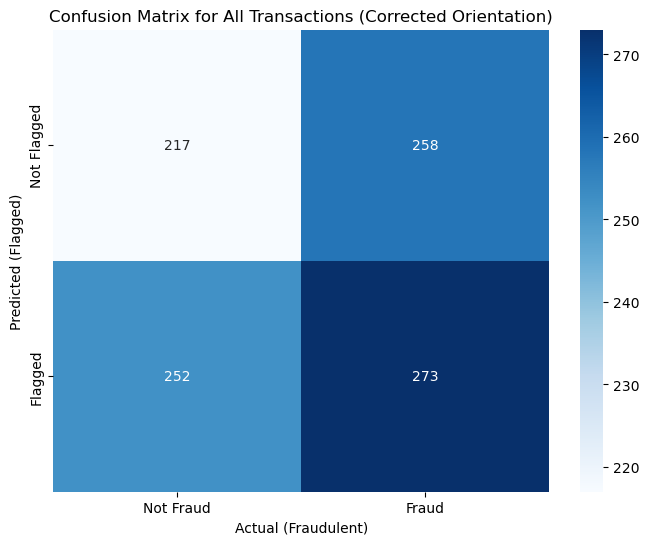

In [178]:
# Create confusion matrix for all transactions with "is_flagged" acting as predicted
actual = transaction_data["fraudulent"]
predicted = transaction_data["is_flagged"]  # Flag acts as predicted

# Generate confusion matrix
cm = confusion_matrix(actual, predicted)

# Generate confusion matrix with corrected axis labels and orientation
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Not Fraud", "Fraud"],
    yticklabels=["Not Flagged", "Flagged"]
)
plt.xlabel("Actual (Fraudulent)")
plt.ylabel("Predicted (Flagged)")
plt.title("Confusion Matrix for All Transactions (Corrected Orientation)")
plt.show()

In [154]:
# Calculate metrics from the confusion matrix
tn, fp, fn, tp = cm.ravel()

# Compute additional metrics
accuracy = accuracy_score(transaction_data["fraudulent"], transaction_data["is_flagged"])
precision = precision_score(transaction_data["fraudulent"], transaction_data["is_flagged"])
recall = recall_score(transaction_data["fraudulent"], transaction_data["is_flagged"])
f1 = f1_score(transaction_data["fraudulent"], transaction_data["is_flagged"])
specificity = tn / (tn + fp)

# Create a summary DataFrame for the metrics
metrics_df = pd.DataFrame({
    "Metric": ["Accuracy", "Precision", "Recall", "Specificity", "F1 Score"],
    "Value": [accuracy, precision, recall, specificity, f1]
})

# Hide the index and display the metrics DataFrame
styled_df1 = metrics_df.style.hide(axis='index')
display(styled_df1)

Metric,Value
Accuracy,0.490000
Precision,0.514124
Recall,0.520000
Specificity,0.456842
F1 Score,0.517045


## 5. Risk Pattern Analysis

The risk pattern analysis focuses on evaluating true positives (TP) and false positives (FP) for each identified risk category. These metrics are selected because they directly assess the ability of risk patterns to identify fraud correctly (TP) and the extent to which legitimate transactions are wrongly flagged as fraudulent (FP). Key findings include:

- Risk patterns with high TP counts, such as "Repeated Login Attempts" and "Suspicious Proxy Usage," are more reliable in identifying actual fraud.
- Patterns with high FP counts, such as "High Velocity Transactions" and "Compromised Device," indicate areas where the model may overflag legitimate transactions, leading to unnecessary operational costs.

By focusing on TP and FP, the analysis highlights which risk patterns are most effective and which require refinement to reduce false alerts while maintaining high detection rates.

In [138]:
# Calculate TP and FP for each risk pattern, sorted by Count and FP
risk_pattern_metrics = []

# Calculate TP, FP for each risk pattern
for pattern in risk_pattern_counts_df["Risk Pattern"]:
    subset = transaction_data[transaction_data["risk_pattern"] == pattern]
    actual = subset["fraudulent"]
    predicted = subset["is_flagged"]
    
    # Generate confusion matrix
    cm_pattern = confusion_matrix(actual, predicted, labels=[0, 1])
    
    # Assign TP and FP correctly
    tp = cm_pattern[1, 1] if cm_pattern.shape == (2, 2) else 0
    fp = cm_pattern[0, 1] if cm_pattern.shape == (2, 2) else 0
    risk_pattern_metrics.append({"Risk Pattern": pattern, "TP": tp, "FP": fp})

# Create a DataFrame with the metrics
risk_pattern_metrics_df = pd.DataFrame(risk_pattern_metrics)

# Merge the counts with the metrics
final_risk_pattern_df = pd.merge(risk_pattern_counts_df, risk_pattern_metrics_df, on="Risk Pattern")

# Add a grand total row
grand_total = final_risk_pattern_df.sum(numeric_only=True)
grand_total["Risk Pattern"] = "Grand Total"
final_risk_pattern_df = pd.concat([pd.DataFrame([grand_total]), final_risk_pattern_df])

# Sort by Count and FP
final_risk_pattern_df = final_risk_pattern_df[["Risk Pattern", "Count", "TP", "FP"]]

# Reset the index and fix the display for Grand Total
final_risk_pattern_df = final_risk_pattern_df.reset_index(drop=True)

# Highlight the "Grand Total" row for better distinction
def highlight_grand_total(row):
    if row["Risk Pattern"] == "Grand Total":
        return ['background-color: yellow; font-weight: bold'] * len(row)
    else:
        return [''] * len(row)

# Apply the styling to the DataFrame
styled_df2 = final_risk_pattern_df.style.apply(highlight_grand_total, axis=1)

# Display the styled DataFrame
display(styled_df2.hide(axis='index'))

Risk Pattern,Count,TP,FP
Grand Total,531,273,258
High Velocity Transactions,47,20,27
Compromised Device,43,21,22
Multiple Account Usage,41,22,19
Geolocation Mismatch,41,20,21
Invalid IP Address,39,18,21
Blacklisted Email Domain,37,14,23
Fraudulent BIN,35,14,21
Repeated Login Attempts,35,22,13
Unverified User,34,19,15


## 6. Conclusion

The findings validate the effectiveness of the "Extra Verification" mechanism in significantly enhancing transaction security by reducing fraud rates. However, the analysis highlights challenges, including low overall accuracy and high false positive rates for certain risk patterns, which indicate areas for improvement in the fraud detection framework. Recommendations include leveraging advanced machine learning models to refine fraud detection algorithms, optimizing risk pattern rules to reduce false positives, and expanding "Extra Verification" to a broader range of transactions. These enhancements will ensure a more robust and efficient transaction security system, balancing fraud prevention with seamless user experiences.